# Stair-case study analyzer

__input__ = arrays of study data 

__output__=  PSEs and analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import wilcoxon

%matplotlib inline

In [108]:
data = [ # DUMMY DATA
    [3,2.75,2.5,2.25,2,1.75,2,2.25,2],
    [2,1.75,1.5,1.25,1,0.75,0.5,0.25,0,-0.25,0,-0.25,],
    [2,1.75,1.5,1.25,1,0.75,1,0.75,], #after change
#     [9,8,7,6,5,6,7,6,5,4,5,6,7,8,7,6,5,4,5,6,5,5],
#     [9,8,7,7,6,5,4,5,6,7,6,5,4,5,6,7,8,7,6,5,4,3,4,5,6,7,6],
#     [9,8,7,6,5,6,7,6,5,4,5,6,7,8,7,6,5,4,5,6,5,5],
#     [9,8,7,7,6,5,4,5,6,7,6,5,4,5,6,7,8,7,6,5,4,3,4,5,6,7,6],
#     [8,7,6,5,4,3,2,3,4,5,4,3,2,1,2,3,2,1,2,3],
#     [9,8,7,6,5,6,7,6,5,4,5,6,7,8,7,6,5,4,5,6,5,5],
#     [9,8,7,7,6,5,4,5,6,7,6,5,4,5,6,7,8,7,6,5,4,3,4,5,6,7,6],
#     [9,8,7,6,5,6,7,6,5,4,5,6,7,8,7,6,5,4,5,6,5,5],
#     [9,8,7,7,6,5,4,5,6,7,6,5,4,5,6,7,8,7,6,5,4,3,4,5,6,7,6],
]

data_pref =[
    [2,1.75,1.5,1.25,1,0.75,1,0.75,], #abdullah
    [2,1.75,1.5,1.25,1,0.75,0.5,0.25,0,-0.25,-0.5,-0.75,-1] #Paul
]
data_pref_2 = [
    [2,1.75,1.5,1.25,1,0.75,1,0.75], #abdullah
    [2,2.25,2.5,2.75,3,2.75,2.5,2.25,2,1.75,1.5,1.25,1,1.25,] #Paul
]
data_2 = [ # DUMMY DATA
    [3,2.75,2.5,2.25,2,1.75,1.5,1.25,1,1.25,1,0.75,1],
    [2,1.75,1.5,1.25,1,0.75,0.5,0.25,0,0.25,0,],
    [2,1.75,1.5,1.25,1,0.75,1,0.75,0.5], #after change
    [2,2.25,2.5,2.75,3,2.75,2.5,2.25,2,1.75,1.5,1.25,1,1.25,] #Paul
#     [7,6,5,4,3,4,5,4,3,4,5,4,3,4,3,4],
#     [8,7,6,5,4,3,2,3,4,5,4,3,2,1,0,1,2,1,2,3],
#     [9,8,7,6,5,4,3,4,5,4,3,2,3,4,5,6,5,4,3,2,3,4],
#     [1,2,3,4,5,4,3,2,3,4,3,2,1,2,3,4,3,4,3,2,3,4],
#     [5,4,3,4,3,2,1,2,3,4,3,2,3],
#     [7,6,5,4,3,4,5,4,3,4,5,4,3,4,3,4],
#     [8,7,6,5,4,3,2,3,4,5,4,3,2,1,0,1,2,1,2,3],
#     [9,8,7,6,5,4,3,4,5,4,3,2,3,4,5,6,5,4,3,2,3,4],
#     [1,2,3,4,5,4,3,2,3,4,3,2,1,2,3,4,3,4,3,2,3,4],
]


## Utilities

In [109]:
def convertScaleToArea(s):
    s = np.array(s)
    w = (0.5*s+1.5)
    h = w*2/3.0
    return w*h

def getLastNReversals(arr, n=3):
    prev_a = 0
    down = False
    ret = []
    for idx, a in enumerate(arr):
        if idx==0:
            prev_a = a
            continue
        elif idx==1:
            if prev_a > a: down = True
            else:          down = False
            prev_a = a
            continue
        else:
            if (down == True) and (prev_a < a):
                down = False
                ret.append(prev_a)
            elif (down == False) and (prev_a > a):
                down = True
                ret.append(prev_a)
        if len(ret) >= n:
            return ret
        prev_a = a
    return ret

In [119]:
def getPSEs(data, n=3):
    ret = []
    for d in data:
        revs = getLastNReversals(d, n)
#         print(revs)
        if len(revs) != 0:
            ret.append(sum(revs) / len(revs))
    return ret
def getPSE(data, n=3):
    revs= getLastNReversals(data, n)
    if len(revs) != 0:
        return sum(revs) / len(revs)
    else: return data[-1]

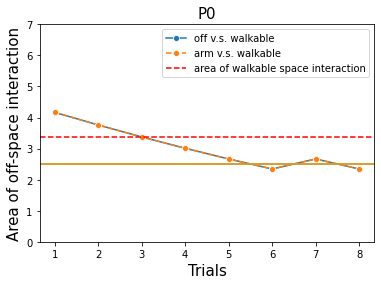

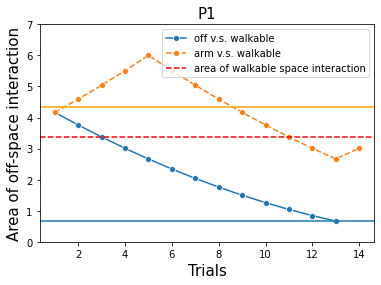

In [136]:
def plotStaircase(arr):
    x = range(1, len(arr)+1)
    y = convertScaleToArea(arr)
    fig, ax = plt.subplots()
    g = sns.lineplot(x=x, y=y, marker="o")
    g.axhline(getPSE(arr, 2))
    
    plt.show()
    
def plotStaircasePerParticipant(arr1, arr2, title=""):
#     x = range(1, len(arr)+1)
#     y = arr
    fig, ax = plt.subplots()
    g = sns.lineplot(x=range(1, len(arr1)+1), y=convertScaleToArea(arr1), marker="o", label="off v.s. walkable")
    g = sns.lineplot(x=range(1, len(arr2)+1), y=convertScaleToArea(arr2), marker="o", label="arm v.s. walkable", linestyle="--")
    g.axhline(getPSE(convertScaleToArea(arr1), 2))
    g.axhline(getPSE(convertScaleToArea(arr2), 2), color='orange')
    
    g.axhline(getPSE(convertScaleToArea([1.5])), color='red', linestyle="--", label='area of walkable space interaction')
    plt.legend()
    plt.title(title, size =15)
    plt.xlabel("Trials", size = 15)
    plt.ylabel("Area of off-space interaction", size = 15)
    plt.ylim(0.0,7.0)
    plt.show()
    
for i in range(0,len(data_pref)):
    title = "P"+str(i)
    plotStaircasePerParticipant(data_pref[i],data_pref_2[i], title)
    
# plotStaircase(data_2[1])


## stat-test

### Wilcoxon test (non-parametric test)

In [112]:
title = wilcoxon(getPSEs(data,5), getPSEs(data_2,5))

ValueError: The samples x and y must have the same length.

<AxesSubplot:title={'center':'P1'}>

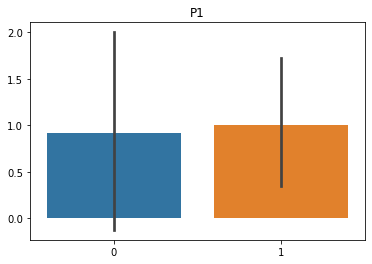

In [113]:
plt.title(title)
sns.barplot(data=[getPSEs(data,5), getPSEs(data_2,5)])

<AxesSubplot:title={'center':'WilcoxonResult(statistic=1.0, pvalue=1.0)'}>

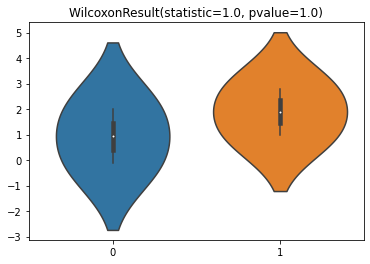

In [13]:
plt.title(title)
sns.violinplot(data=[getPSEs(data,5), getPSEs(data_2,5)])